In [70]:
import pandas as pd
import pickle
file_path = "../data_analysis_reports/Sample_Data.xlsx"
data = pd.read_excel(file_path)
data

,Year,Month,InsuredCount,ChildLessThan18,AdultLessThan40,MiddleLessThan55,OldGreaterThan55,ActiveWeight_P1,ActiveWeight_P3,ActiveWeight_P4,...,ActiveWeight_P19,ActiveWeight_P21,Payment Amount,Male,Others,Female,Married,Unmarried,Acute,Chronic
0,0,January,136626,26040,90977,26300,2606,2533789,508722,398965,...,575602,342686,44852164,114879,1614,20133,118169,18457,38172,98454
1,0,February,125493,27393,85442,25467,2706,2448114,541483,420418,...,558697,353603,44659416,99331,452,25710,94881,30612,5678,119815
2,0,March,142683,26730,85344,27137,2428,2492737,562427,474710,...,577525,393263,44063816,114315,763,27605,125213,17470,32184,110499
3,0,April,128047,24259,78568,24174,2239,2421053,461990,437503,...,514085,308989,45525904,111318,1592,15137,106293,21754,7343,120704
4,0,May,107337,22638,71614,16728,1371,1992105,377978,253249,...,194745,257899,33637268,102078,1253,4006,70292,37045,15070,92267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2023,November,143177,25757,92062,26710,2621,2575971,508170,397729,...,602138,341106,45234244,107002,1786,34389,121856,21321,5351,137826
995,2023,December,146122,26977,88671,27474,2571,2555805,567541,466263,...,617165,392132,44554212,138017,1790,6315,90310,55812,156,145966
996,2024,January,134676,24894,81833,24336,2348,2457246,465105,393970,...,525833,305197,44627024,71391,2301,60984,116623,18053,9754,124922
997,2024,February,147500,25413,90848,26615,2673,2581242,501029,402536,...,618412,337486,45918568,137659,1304,8537,77747,69753,15786,131714


In [71]:
data = data.drop(columns=['Month','Year'])

data=data.drop(index=6)
data.shape

(998, 31)

In [72]:
test=data.iloc[[-1]]
test

,InsuredCount,ChildLessThan18,AdultLessThan40,MiddleLessThan55,OldGreaterThan55,ActiveWeight_P1,ActiveWeight_P3,ActiveWeight_P4,ActiveWeight_P5,ActiveWeight_P6,...,ActiveWeight_P19,ActiveWeight_P21,Payment Amount,Male,Others,Female,Married,Unmarried,Acute,Chronic
998,136565,28681,86749,26093,2927,2602472,563558,442841,374351,1109472,...,644264,369569,45243720,99516,136,36913,118222,18343,59628,76937


In [73]:
# Dropping rows with null values in 'Payment Amount'
data= data.dropna(subset=['Payment Amount'])
data

,InsuredCount,ChildLessThan18,AdultLessThan40,MiddleLessThan55,OldGreaterThan55,ActiveWeight_P1,ActiveWeight_P3,ActiveWeight_P4,ActiveWeight_P5,ActiveWeight_P6,...,ActiveWeight_P19,ActiveWeight_P21,Payment Amount,Male,Others,Female,Married,Unmarried,Acute,Chronic
0,136626,26040,90977,26300,2606,2533789,508722,398965,351491,1114603,...,575602,342686,44852164,114879,1614,20133,118169,18457,38172,98454
1,125493,27393,85442,25467,2706,2448114,541483,420418,343563,1051250,...,558697,353603,44659416,99331,452,25710,94881,30612,5678,119815
2,142683,26730,85344,27137,2428,2492737,562427,474710,368646,1130256,...,577525,393263,44063816,114315,763,27605,125213,17470,32184,110499
3,128047,24259,78568,24174,2239,2421053,461990,437503,313982,959855,...,514085,308989,45525904,111318,1592,15137,106293,21754,7343,120704
4,107337,22638,71614,16728,1371,1992105,377978,253249,231591,805103,...,194745,257899,33637268,102078,1253,4006,70292,37045,15070,92267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,143177,25757,92062,26710,2621,2575971,508170,397729,366108,1145095,...,602138,341106,45234244,107002,1786,34389,121856,21321,5351,137826
995,146122,26977,88671,27474,2571,2555805,567541,466263,385281,1154440,...,617165,392132,44554212,138017,1790,6315,90310,55812,156,145966
996,134676,24894,81833,24336,2348,2457246,465105,393970,322557,1003846,...,525833,305197,44627024,71391,2301,60984,116623,18053,9754,124922
997,147500,25413,90848,26615,2673,2581242,501029,402536,370680,1141143,...,618412,337486,45918568,137659,1304,8537,77747,69753,15786,131714


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

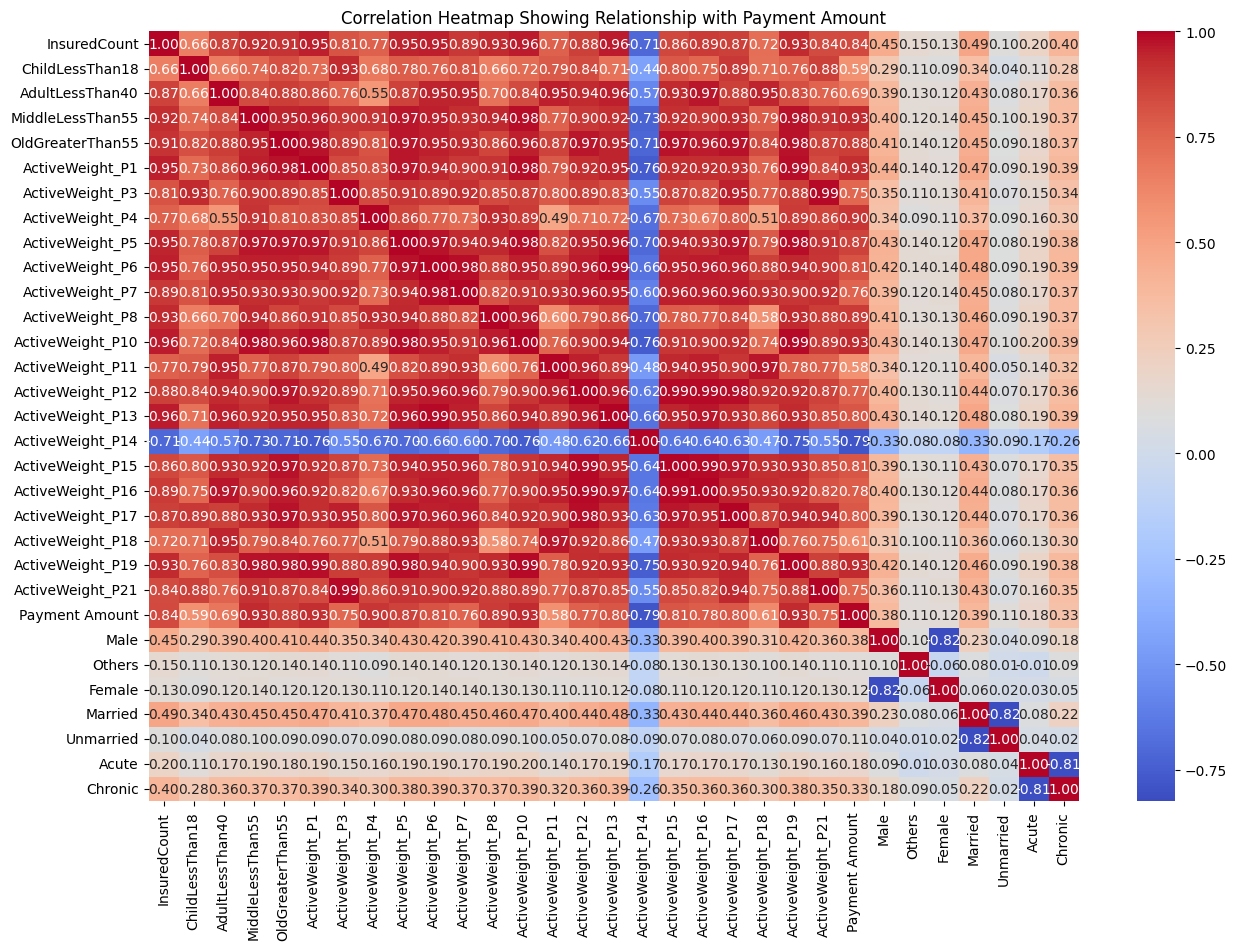

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()

# #dump correlations
# payment_correlation = correlation_matrix['Payment Amount'].drop('Payment Amount')
# correlation_dict = payment_correlation.to_dict()
# with open('correlation.pkl','wb') as file:
#     pickle.dump(correlation_dict, file)
    
# Plotting the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Showing Relationship with Payment Amount')
plt.show()

In [76]:
missing_values = data.isnull().sum()
missing_values

InsuredCount        0
ChildLessThan18     0
AdultLessThan40     0
MiddleLessThan55    0
OldGreaterThan55    0
ActiveWeight_P1     0
ActiveWeight_P3     0
ActiveWeight_P4     0
ActiveWeight_P5     0
ActiveWeight_P6     0
ActiveWeight_P7     0
ActiveWeight_P8     0
ActiveWeight_P10    0
ActiveWeight_P11    0
ActiveWeight_P12    0
ActiveWeight_P13    0
ActiveWeight_P14    0
ActiveWeight_P15    0
ActiveWeight_P16    0
ActiveWeight_P17    0
ActiveWeight_P18    0
ActiveWeight_P19    0
ActiveWeight_P21    0
Payment Amount      0
Male                0
Others              0
Female              0
Married             0
Unmarried           0
Acute               0
Chronic             0
dtype: int64

In [77]:
X = data.drop(columns=["Payment Amount"])
y = data[["Payment Amount"]]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

missing_values, X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

(InsuredCount        0
 ChildLessThan18     0
 AdultLessThan40     0
 MiddleLessThan55    0
 OldGreaterThan55    0
 ActiveWeight_P1     0
 ActiveWeight_P3     0
 ActiveWeight_P4     0
 ActiveWeight_P5     0
 ActiveWeight_P6     0
 ActiveWeight_P7     0
 ActiveWeight_P8     0
 ActiveWeight_P10    0
 ActiveWeight_P11    0
 ActiveWeight_P12    0
 ActiveWeight_P13    0
 ActiveWeight_P14    0
 ActiveWeight_P15    0
 ActiveWeight_P16    0
 ActiveWeight_P17    0
 ActiveWeight_P18    0
 ActiveWeight_P19    0
 ActiveWeight_P21    0
 Payment Amount      0
 Male                0
 Others              0
 Female              0
 Married             0
 Unmarried           0
 Acute               0
 Chronic             0
 dtype: int64,
 (798, 30),
 (200, 30),
 (798, 1),
 (200, 1))

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model    
    r2 = r2_score(y_test, y_pred)

    return r2

In [80]:
# Linear Regression Model
linear_model = LinearRegression()

# Train and evaluate the Linear Regression model
linear_r2 = train_and_evaluate_model(linear_model, X_train_scaled, y_train, X_test_scaled, y_test)

linear_r2


0.9990764641408809

In [81]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
# MultiOutputRegressor with Gradient Boosting
multioutput_gb_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

# Train and evaluate the MultiOutput Gradient Boosting model
gb_multi_r2 = train_and_evaluate_model(multioutput_gb_model, X_train_scaled, y_train, X_test_scaled, y_test)

gb_multi_r2

0.9942470183128298

In [82]:
test

,InsuredCount,ChildLessThan18,AdultLessThan40,MiddleLessThan55,OldGreaterThan55,ActiveWeight_P1,ActiveWeight_P3,ActiveWeight_P4,ActiveWeight_P5,ActiveWeight_P6,...,ActiveWeight_P19,ActiveWeight_P21,Payment Amount,Male,Others,Female,Married,Unmarried,Acute,Chronic
998,136565,28681,86749,26093,2927,2602472,563558,442841,374351,1109472,...,644264,369569,45243720,99516,136,36913,118222,18343,59628,76937


In [83]:
# Extract the last row from the original data

#last_row = data.iloc[[-1]]

last_row = test


# Drop the target column from the last row
X_last_row = last_row.drop(columns=["Payment Amount"])

with open('scaler.pkl','wb') as file:
    pickle.dump(scaler, file)
# Scale the features of the last row using the same scaler
X_last_row_scaled = scaler.transform(X_last_row)


claim_amount_prediction_linear = linear_model.predict(X_last_row_scaled)
claim_amount_prediction_gb_multi = multioutput_gb_model.predict(X_last_row_scaled)

In [84]:
# Predicted claim amount using Linear Regression
claim_amount_prediction_linear_str = "{:,.2f}".format(claim_amount_prediction_linear[0][0])
print("Predicted claim amount using Linear Regression:", claim_amount_prediction_linear_str)

# Predicted claim amount using MultiOutput Gradient Boosting
claim_amount_prediction_gb_multi_str = "{:,.2f}".format(claim_amount_prediction_gb_multi[0][0])
print("Predicted claim amount using MultiOutput Gradient Boosting:", claim_amount_prediction_gb_multi_str)


Predicted claim amount using Linear Regression: 45,358,175.22
Predicted claim amount using MultiOutput Gradient Boosting: 45,094,673.54


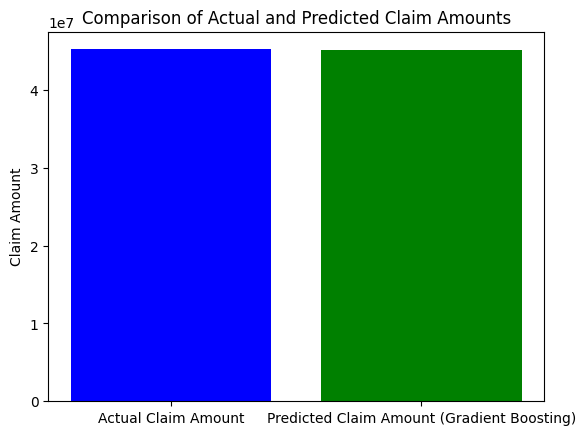

Actual Claim Amount: 45243720
Predicted Claim Amount: 45094673.5386427
Absolute difference: 149046.46135730296


In [85]:
import matplotlib.pyplot as plt

# Actual claim amount from the last row
actual_claim_amount = last_row["Payment Amount"].values[0]

# Predicted claim amount using Gradient Boosting
predicted_claim_amount_gb = claim_amount_prediction_gb_multi[0][0]

# Calculate the absolute difference
difference = abs(actual_claim_amount - predicted_claim_amount_gb)

# Plotting the comparison
labels = ['Actual Claim Amount', 'Predicted Claim Amount (Gradient Boosting)']
values = [actual_claim_amount, predicted_claim_amount_gb]

plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.ylabel('Claim Amount')
plt.title('Comparison of Actual and Predicted Claim Amounts')
plt.show()

print("Actual Claim Amount:", actual_claim_amount)
print("Predicted Claim Amount:", predicted_claim_amount_gb)
print("Absolute difference:", difference)


In [86]:
with open('multioutput_gb_model.pkl','wb') as file:
    pickle.dump(multioutput_gb_model, file)

In [87]:
with open('linear_model.pkl','wb') as file:
    pickle.dump(linear_model, file)

In [88]:
with open('correlation.pkl','wb') as file:
    pickle.dump(correlation_matrix["Payment Amount"].to_dict(),file)